# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test: Solving and simulating the household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
- 4. [Expected discounted utility](#toc4_)       
- 5. [Find transition path](#toc5_)
- 6. [Policy functions](#toc6_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [503]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [504]:
model = HANCWelfareModelClass(name='baseline')

In [505]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [506]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.chi = 0.0
ss.S = 0.0
ss.tau = 0.015

We can now solve and simulate:

In [507]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.7 secs [345 iterations]


In [508]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.0 secs [399 iterations]


And we can check whether the results make sort of sense:

In [509]:
print(f'{model.ss.A_hh = :.2f}')
print(f'{model.ss.L_hh = :.2f}')
print(f'{model.ss.C_hh = :.2f}')

model.ss.A_hh = 2.02
model.ss.L_hh = 1.06
model.ss.C_hh = 0.78


## 3. <a id='toc4_'></a>[Find stationary equilibrium](#toc0_)

In [510]:
model.info(only_blocks=True)

production_firm: [K,LY] -> [rK,w,Y]
mutual_fund: [K,rK] -> [A,r]
government: [w,LG] -> [tau,wt,G,S,chi,budget]
hh: [S,chi,r,tau,wt] -> [A_hh,C_hh,ELL_hh,L_hh,INC_hh,U_hh]
market_clearing: [A,A_hh,LY,LG,L_hh,Y,C_hh,K,G] -> [I,clearing_A,clearing_L,clearing_Y]


In [511]:
model.find_ss(LG=0.0,do_print=True)

starting at KL=3.8624

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.031e-12 -1.832e-13]
       x: [ 3.673e+00 -1.920e-13]
    nfev: 11
    fjac: [[-9.998e-01 -1.984e-02]
           [ 1.984e-02 -9.998e-01]]
       r: [-7.646e+00 -2.558e+00 -1.058e+00]
     qtf: [-7.064e-10  1.448e-10]

steady state found in 11.4 secs
ss.K =  3.389
ss.budget = -0.000
ss.A_hh =  3.389
ss.Y =  1.363
ss.r =  0.021
ss.w =  1.034
ss.G =  0.000
ss.LG =  0.000
ss.LY =  0.923
ss.tau = -0.000
ss.chi =  0.000
ss.clearing_A = 1.03e-12
ss.clearing_L = 0.00e+00
ss.clearing_Y = 0.00e+00


In [512]:
model.info(only_blocks=True,ss=True)

production_firm: [K=3.39,LY=0.92] -> [rK=0.12,w=1.03,Y=1.36]
mutual_fund: [K=3.39,rK=0.12] -> [A=3.39,r=0.02]
government: [w=1.03,LG=0.00] -> [tau=-0.00,wt=1.03,G=0.00,S=0.00,chi=0.00,budget=-0.00]
hh: [S=0.00,chi=0.00,r=0.02,tau=-0.00,wt=1.03] -> [A_hh=3.39,C_hh=1.02,ELL_hh=0.99,L_hh=0.92,INC_hh=1.02,U_hh=-100000001.62]
market_clearing: [A=3.39,A_hh=3.39,LY=0.92,LG=0.00,L_hh=0.92,Y=1.36,C_hh=1.02,K=3.39,G=0.00] -> [I=0.34,clearing_A=0.00,clearing_L=0.00,clearing_Y=0.00]


In [513]:
model.test_path()

shocks: 
unknowns: K LG LY 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
blocks.government
 tau              0.0e+00
 wt               0.0e+00
 G                0.0e+00
 S                0.0e+00
 chi              0.0e+00
 budget           0.0e+00
hh
 A_hh             2.7e-09
 C_hh             1.3e-10
 ELL_hh           1.2e-10
 L_hh             1.0e-10
 INC_hh           4.9e-11
 U_hh             5.7e-07
blocks.market_clearing
 I                5.6e-17
 clearing_A       2.7e-09 [target]
 clearing_L       1.0e-10 [target]
 clearing_Y       1.3e-10


## 4. <a id='toc9_'></a>[Expected discounted utility](#toc0_)

In [ ]:
V_hh_ss = np.sum([par.beta**t*ss.U_hh for t in range(par.T)])
print(f'Expected discounted utility with ss.G, ss.LG, ss.chi = 0: {V_hh_ss}')

Expected discounted utility with ss.G, ss.LG, ss.chi = 0: -2500000037.0322566


In [13]:
def optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y):

    def target(LG, chi):
        ss.chi = chi
        par.Gamma_Y = Gamma_Y
        model.find_ss(LG)
        return -ss.U_hh

    results = {}

    for chi in chi_values:
        res = optimize.minimize_scalar(target, args=(chi,), bounds=(0.0, 0.4), method='bounded')
        LG_max_U_hh = res.x
        max_U_hh = res.fun

        V_hh_ss = np.sum([par.beta**t * ss.U_hh for t in range(par.T)])
        opt_G = par.Gamma_G * LG_max_U_hh

        results[chi] = {
            'LG_max_U_hh': LG_max_U_hh,
            'opt_G': opt_G,
            'V_hh_ss': V_hh_ss,
            'G_over_Y': opt_G / ss.Y
        }

        print(f"For chi = {chi}:")
        print(f"Optimal ss.LG: {results[chi]['LG_max_U_hh']:.4f}")
        print(f"Optimal ss.G: {results[chi]['opt_G']:.4f}")
        print(f"Total expected utility: {results[chi]['V_hh_ss']:.4f}")
        print(f"G/Y: {results[chi]['G_over_Y']:.4f}\n")

    return results

In [14]:
result_fixed_chi = optimize_welfare_policies(model, par, ss, chi_values=[0.0], Gamma_Y=1.0)

For chi = 0.0:
Optimal ss.LG: 0.2751
Optimal ss.G: 0.2751
Total expected utility: -171.2845
G/Y: 0.3074



In [87]:
chi_values = [-0.001, 0.001] 
results = optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y=1.0)

For chi = -0.001:
Optimal ss.LG: 0.2747
Optimal ss.G: 0.2747
Total expected utility: -172.5756
G/Y: 0.3071

For chi = 0.001:
Optimal ss.LG: 0.2754
Optimal ss.G: 0.2754
Total expected utility: -173.2193
G/Y: 0.3100



In [27]:
chi_values = [-0.001, 0.0, 0.001]
result_increased_TFP = optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y=1.1)

For chi = -0.001:
Optimal ss.LG: 0.2815
Optimal ss.G: 0.2815
Total expected utility: -162.0525
G/Y: 0.2944

For chi = 0.0:
Optimal ss.LG: 0.2810
Optimal ss.G: 0.2810
Total expected utility: -162.2559
G/Y: 0.2943

For chi = 0.001:
Optimal ss.LG: 0.2806
Optimal ss.G: 0.2806
Total expected utility: -162.4615
G/Y: 0.2943



## 5. <a id='toc9_'></a>[Find transition path](#toc0_)

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 2.0 secs]
finding Jacobian wrt. S              : 0 125 250 375 [computed in 1.4 secs]
finding Jacobian wrt. chi            : 0 125 250 375 [computed in 1.4 secs]
finding Jacobian wrt. r              : 0 125 250 375 [computed in 1.5 secs]
finding Jacobian wrt. tau            : 0 125 250 375 [computed in 1.5 secs]
finding Jacobian wrt. wt             : 0 125 250 375 [computed in 2.1 secs]
household Jacobian computed in 10.0 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for S               in 1.5 secs
curly_Y and curly_D calculated for chi             in 1.9 secs
curly_Y and curly_D calculated for r               in 1.7 secs
curly_Y and curly_D calculated for tau             in 2.1 secs
curly_Y and curly_D calculated for wt              in 1.6 secs
curly_E calculated in 0.4 secs
buili

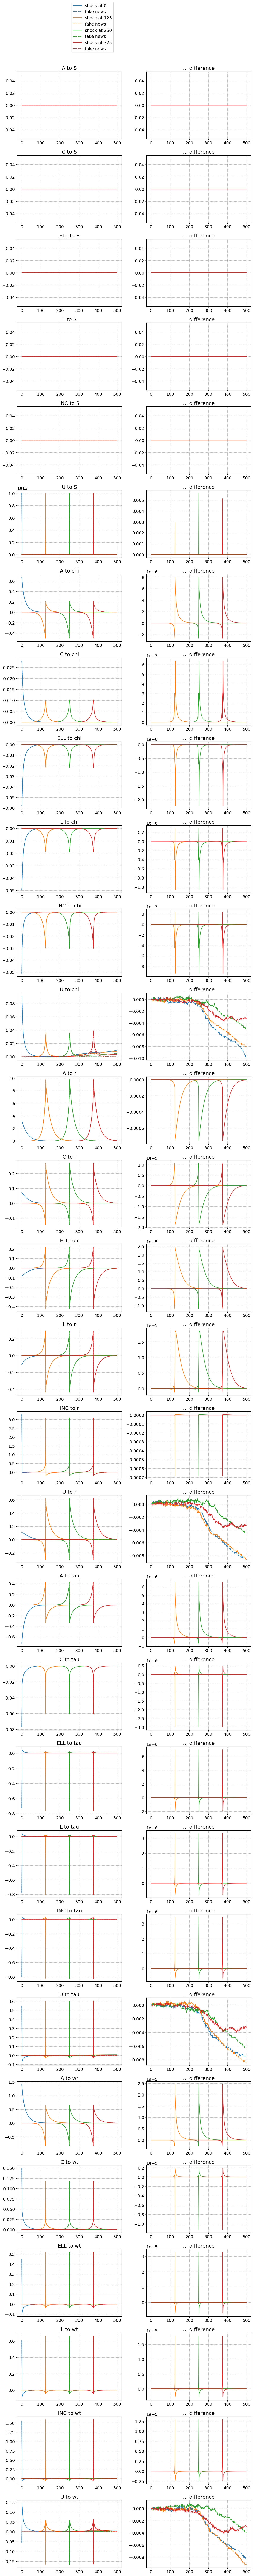

In [514]:
model.test_jacs()

In [529]:
for (var1, var2), jac in model.jac.items():
    rows, cols = jac.shape
    if rows != cols:
        print(f"Jacobian for {var1} with respect to {var2} is not square: {rows}x{cols}")

In [516]:
# ss.LG = 0.2810
model.compute_jacs(do_print=True)
model.find_transition_path(shocks=[],do_print=True,do_print_unknowns=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for S               in 2.0 secs
curly_Y and curly_D calculated for chi             in 1.7 secs
curly_Y and curly_D calculated for r               in 1.7 secs
curly_Y and curly_D calculated for tau             in 1.8 secs
curly_Y and curly_D calculated for wt              in 1.8 secs
curly_E calculated in 0.4 secs
builiding blocks combined in 1.0 secs
household Jacobian computed in 10.6 secs

full Jacobians:
full Jacobian to unknowns computed in 2.2 secs [in evaluate_blocks(): 1.0 secs]
full Jacobian to shocks computed in 0.1 secs [in evaluate_blocks(): 0.0 secs]
finding the transition path:
 it =   0 -> max. abs. error = 2.70e-09
   K              : minval =    3.39 meanval =    3.39 maxval =    3.39
   LG             : minval =    0.00 meanval =    0.00 maxval =    0.00
   LY             : minval =    0.92 meanval =    0.92 maxval =    0.92
   2.70e-09 in clearing_A
   1.04e

LinAlgError: Last 2 dimensions of the array must be square

### shocks ###


<Figure size 1200x0 with 0 Axes>


### varnames ###


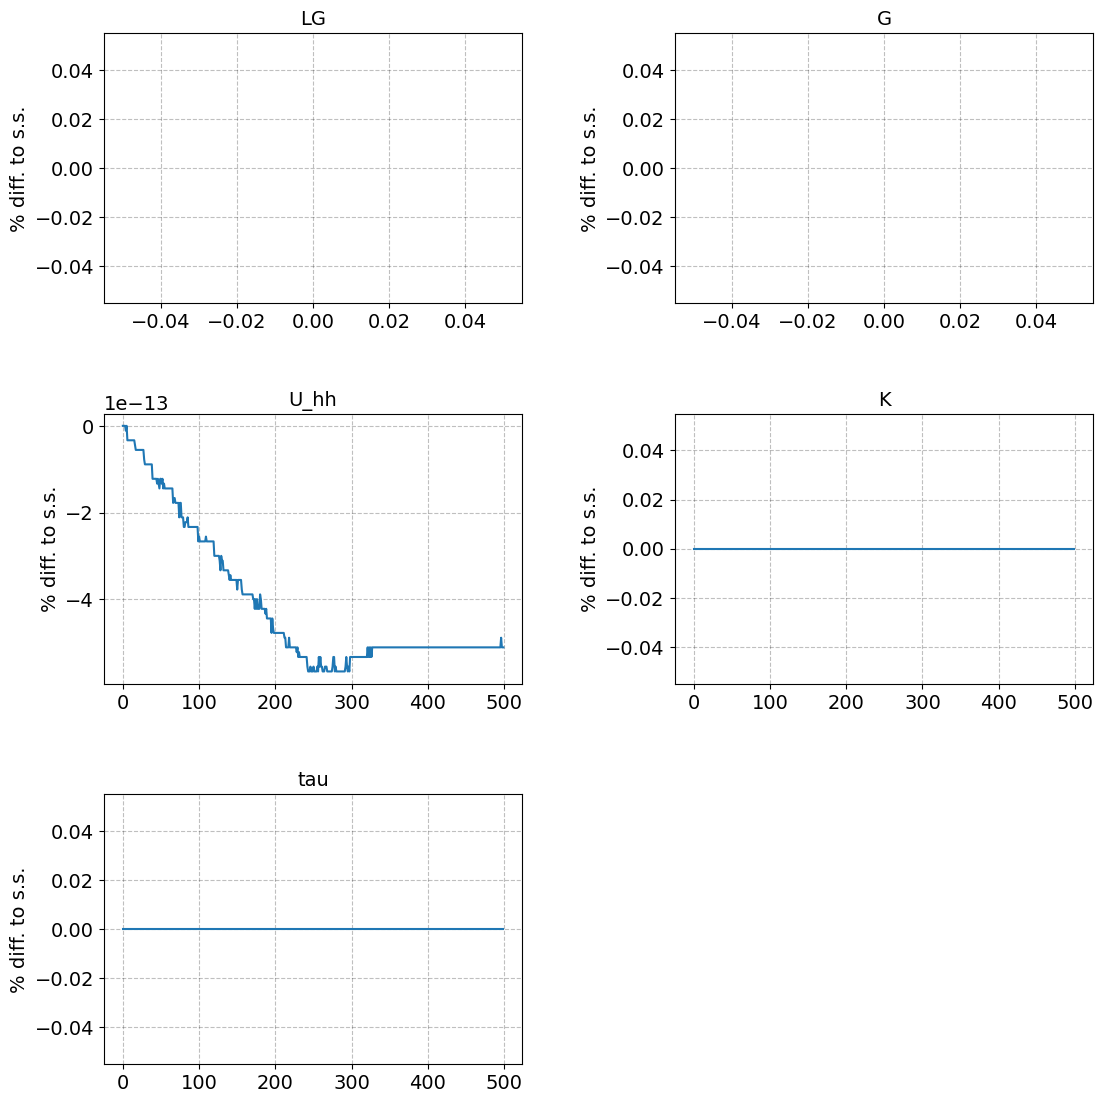


### tagets ###


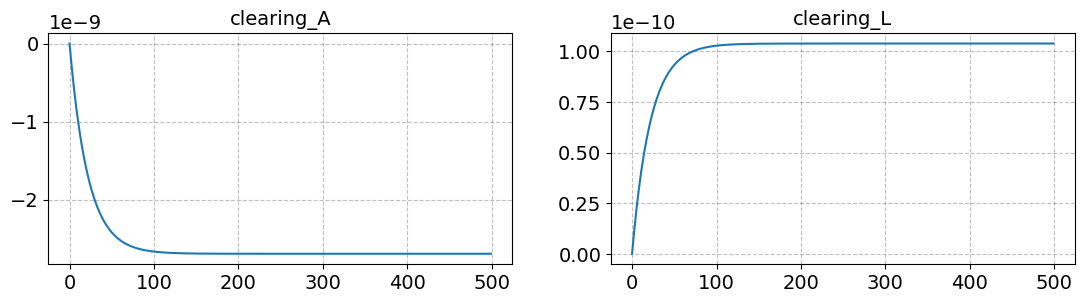

In [519]:
model.show_IRFs(varnames=['LG','G','U_hh','K','tau'],lvl_value=['chi'],ncols=2)

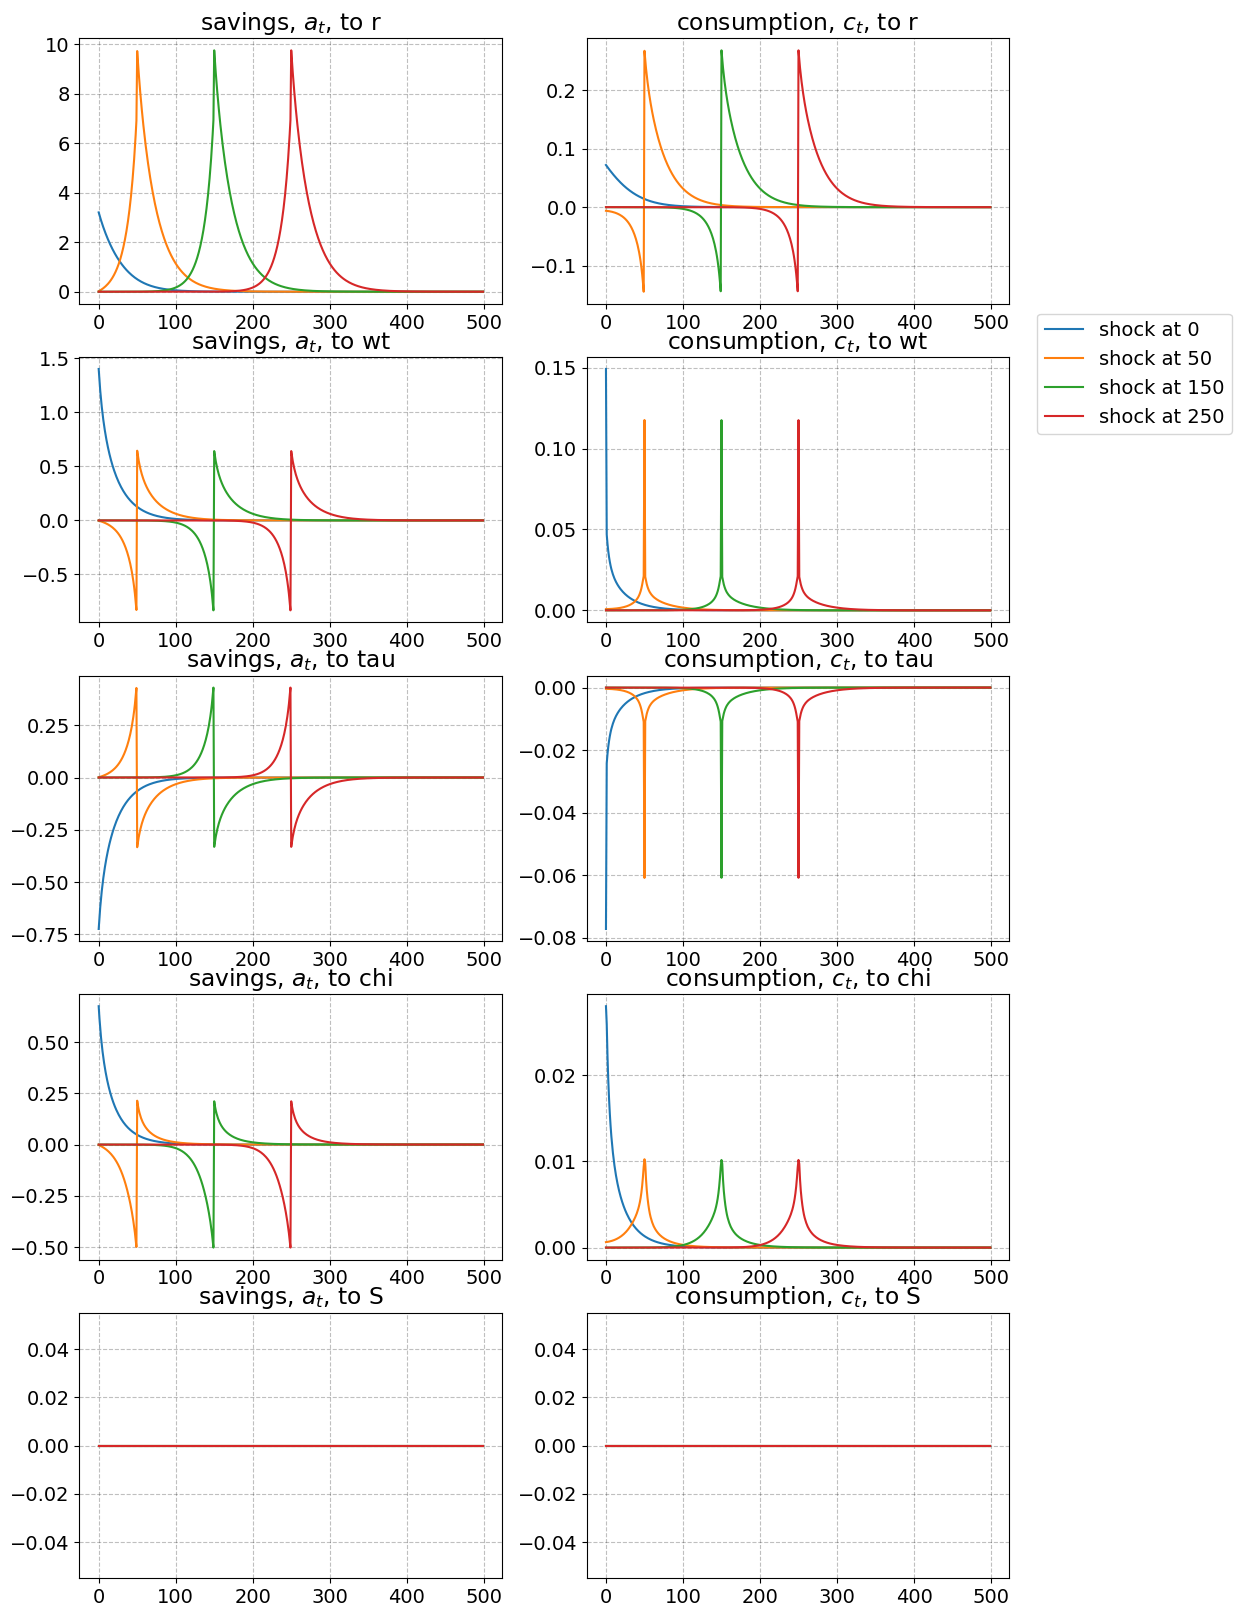

In [520]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    if i == 1:
        ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
        
plt.show()

['Gamma_Y']
household problem solved along transition path in 0.9 secs
household problem simulated along transition in 0.1 secs

['chi']
household problem solved along transition path in 1.9 secs
household problem simulated along transition in 0.0 secs

['G']
household problem solved along transition path in 0.9 secs
household problem simulated along transition in 0.0 secs

['LG']
household problem solved along transition path in 1.1 secs
household problem simulated along transition in 0.5 secs

None
household problem solved along transition path in 0.9 secs
household problem simulated along transition in 0.0 secs

all
household problem solved along transition path in 0.9 secs
household problem simulated along transition in 0.0 secs



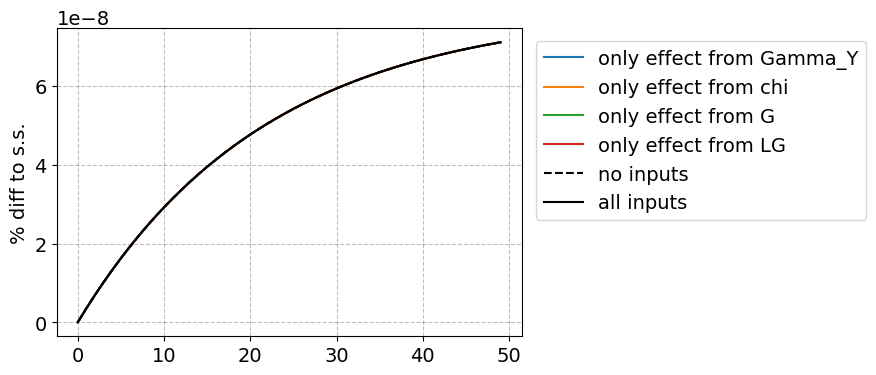

In [523]:
T_max = 50

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
    
i_color = 0
for use_inputs in [['Gamma_Y'],['chi'],['G'],['LG'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.A_hh[:50]/ss.A_hh-1)*100,ls=ls,color=color,label=label);

ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True,bbox_to_anchor=(1.01,0.99));

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 1.2 secs
household problem simulated along transition in 0.1 secs



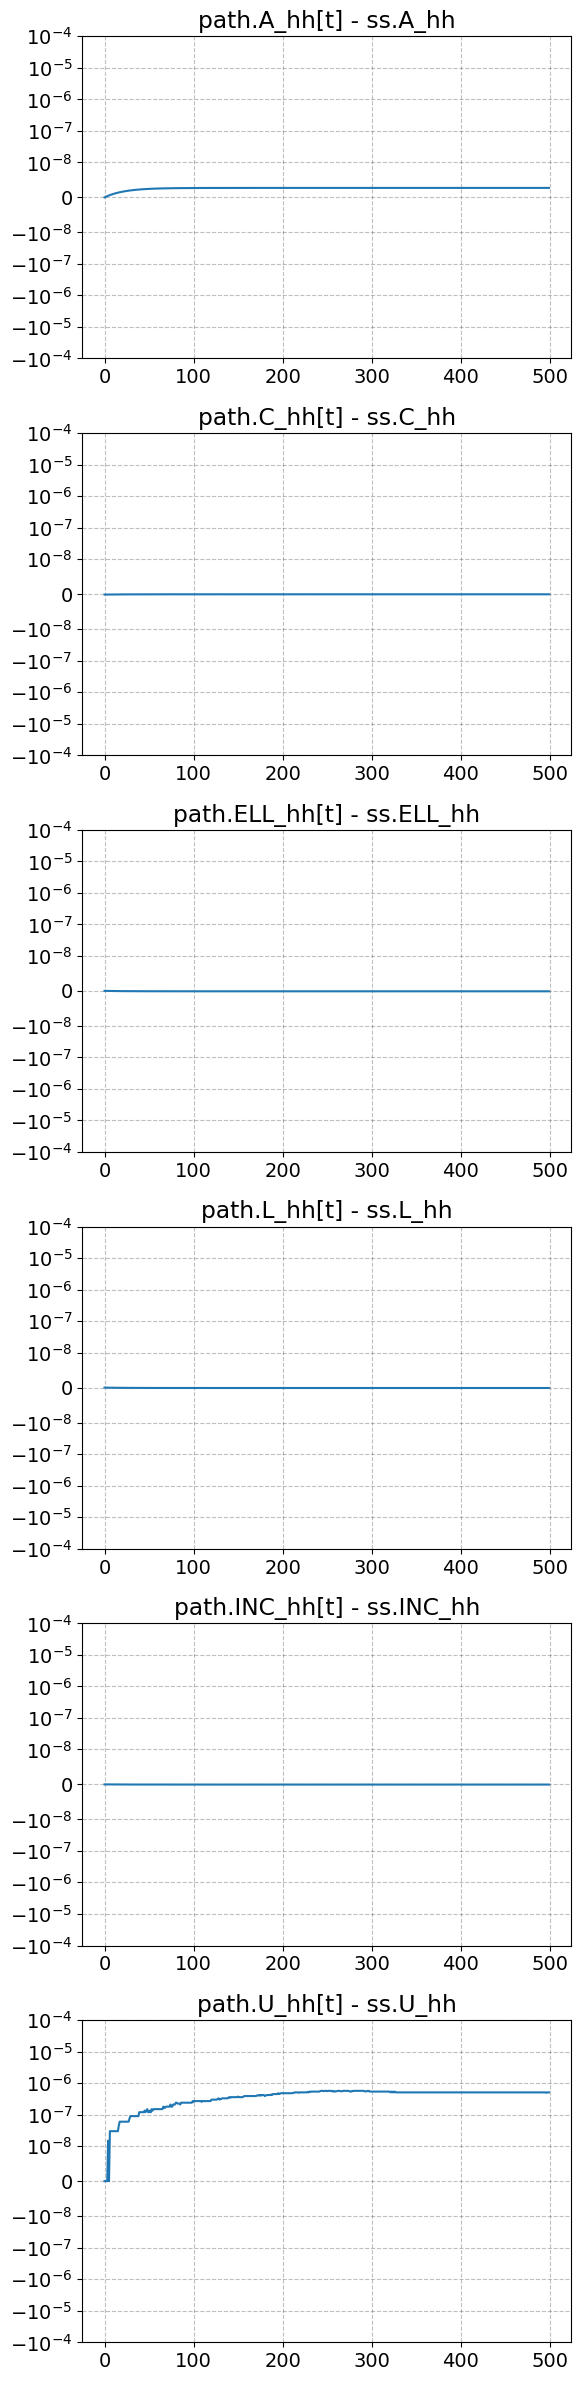

In [480]:
model.test_hh_path()

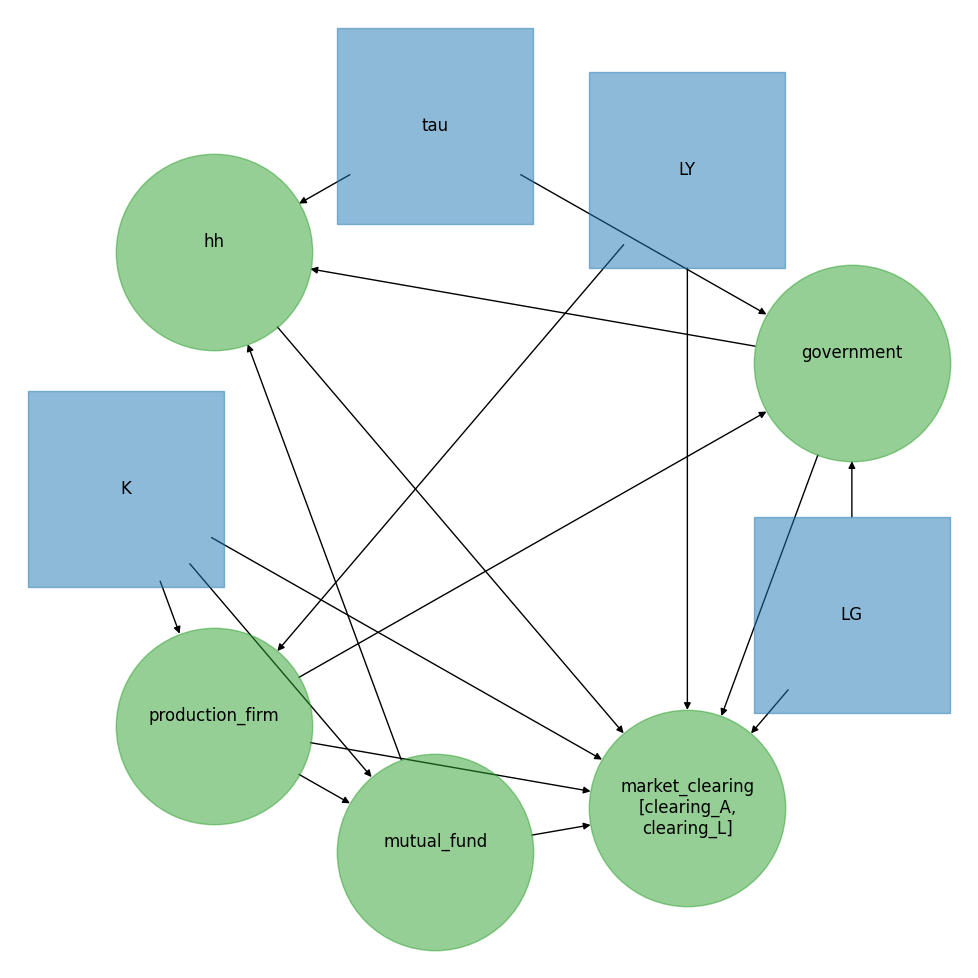

In [482]:
model.draw_DAG(filename='DAG.png')

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

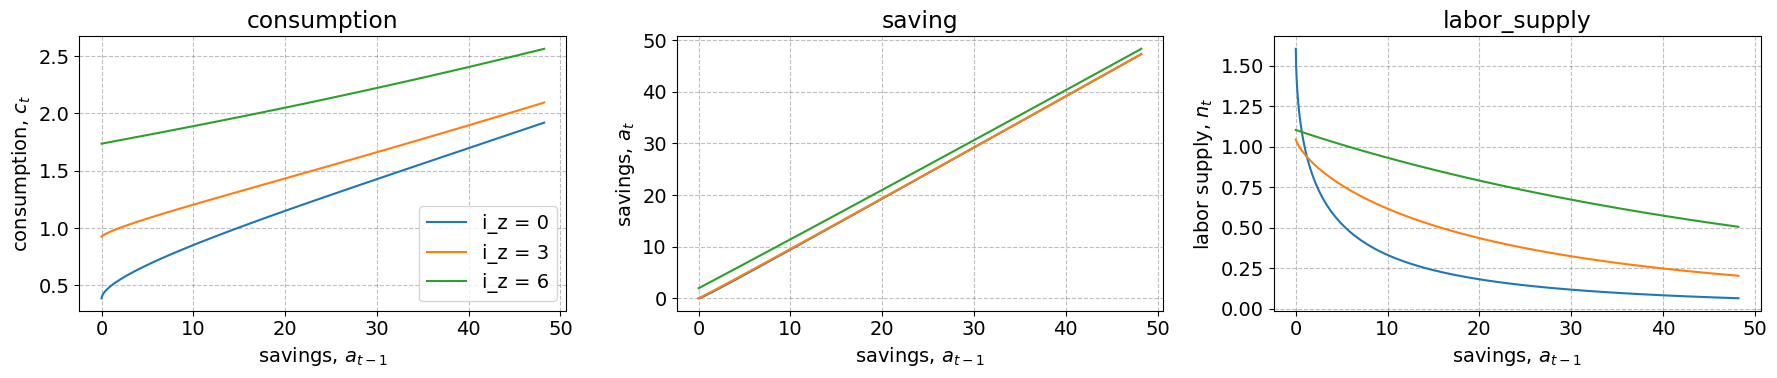

In [473]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()